### 212 part 1
#### K-means clustering

Question

Can group characteristics  be found using K-Means clustering to determine similar groups within the patient population?

In [3]:
# Set up of notebook

import pandas as pd # used to create the dataframe
import numpy as np  #Required dependancy for scikit.learn to run
import matplotlib.pyplot as plt # to visualize the data
import seaborn as sns #Used to visualize the data
from sklearn.cluster import KMeans # Used to run the Kmeans model for clustering the data
from sklearn.preprocessing import StandardScaler # Used to scale the data
from collections import Counter # to find the size of the clusters
from sklearn.metrics import silhouette_score # to find the sillouette score

%matplotlib inline

In [4]:
#Import data
med_df = pd.read_csv('medical_clean.csv')
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [5]:
## Find duplicates
print(med_df.duplicated().value_counts()) # this gives a count of unique values (this case is true/false)
print(med_df.duplicated().sum()) # This gives a count of the number of duplicates(counting the true)

False    10000
Name: count, dtype: int64
0


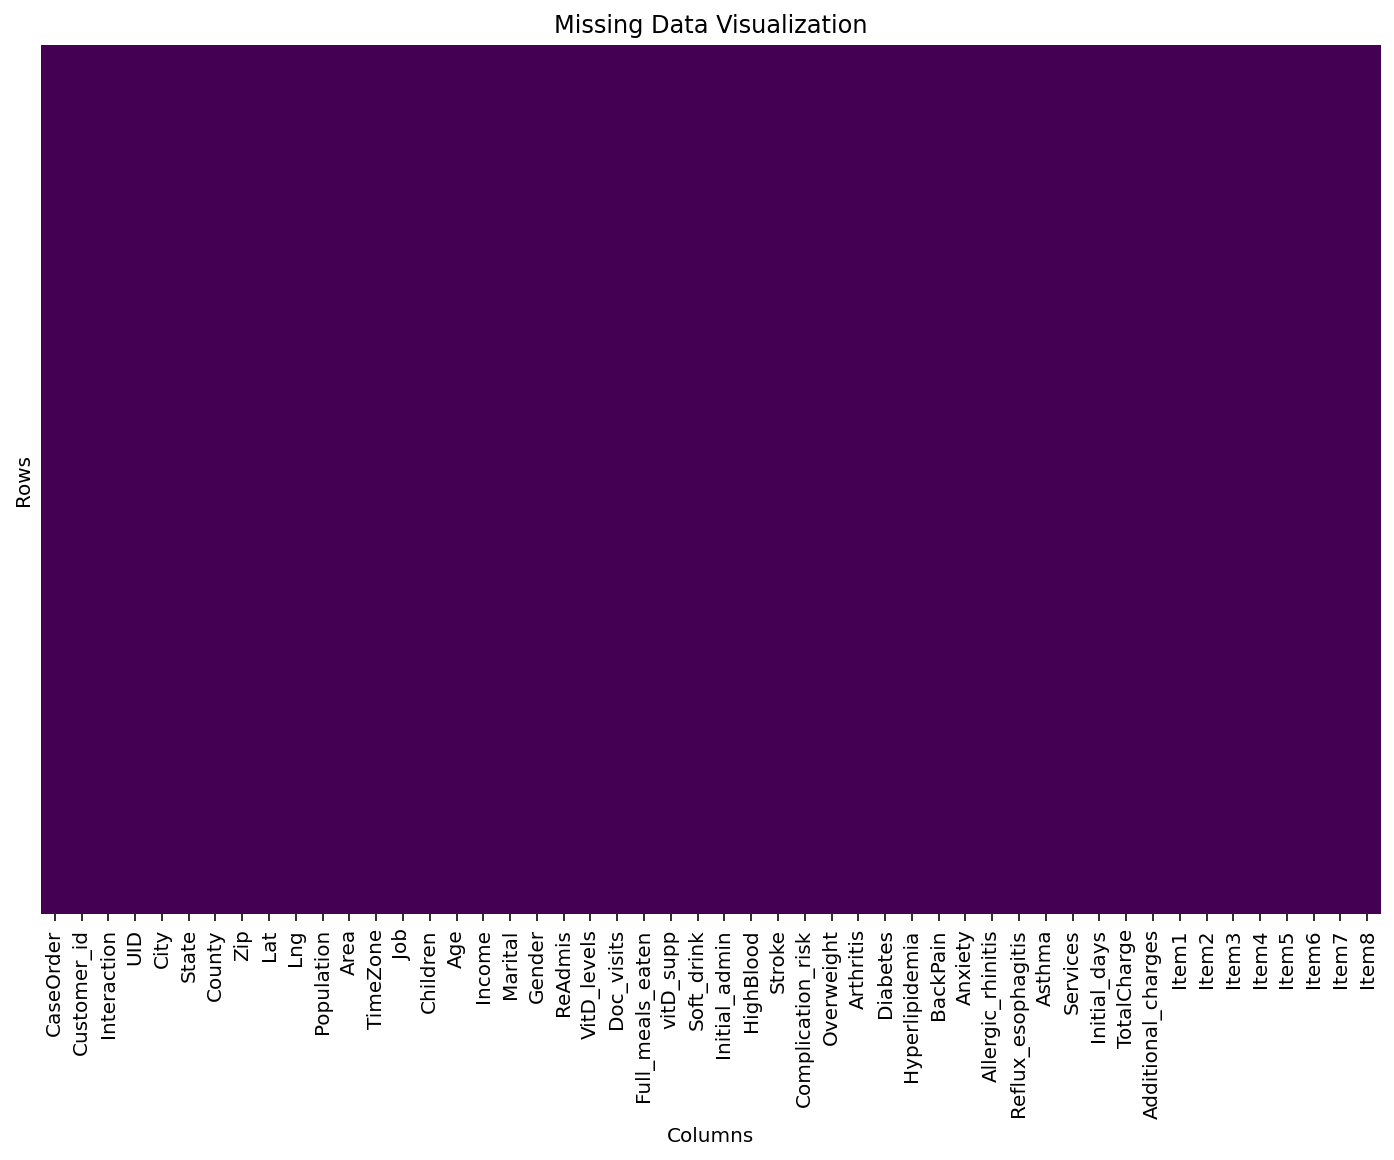

In [6]:
## Create Visualizations of the missing value

plt.figure(figsize=(12, 8))  # Adjust the figure size as necessary

# Create a heatmap to visualize missing data (null values)
# Set cbar=False to hide the color bar and add column names (xticklabels) for clarity
sns.heatmap(med_df.isnull(), cbar=False, cmap='viridis', yticklabels=False, xticklabels=med_df.columns)
plt.xticks(rotation=90)  # Rotate column names for better readability

plt.title('Missing Data Visualization')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

#### Rename the data set
I do this on all data sets so that I know I have checked for duplicates and NAs

In [7]:
#Rename dataset
clean_df = med_df.copy()

#Explore the data
clean_df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [8]:
#Explore summary statistiscs on a data set
clean_df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [9]:
# Clean the data set columns using created function based on tresholds
#missing_threshold = 0.95, unique_threshold = 0.95, only 1 value in a column --> removes

#Function for cleaning columns
def clean_columns(df, columns =[], missing_threshold = 0.95, unique_threshold = 0.95, messages = True):
    
    if len(columns) == 0:
        columns = df.columns #this lets the columns be blank and every columns will be cleaned
    
    for col in columns:
        if col in df.columns:
            missing = df[col].isna().sum()
            unique = df[col].nunique()
            rows = df.shape[0]  
            
            if missing / rows >= missing_threshold:
                if messages: print(f"To many missing values with ({missing} out of {rows}, {round((missing / rows) * 100, 2)}%) for {col}, removed")
                df.drop(columns =[col], inplace = True)
            # For non-numeric columns, check if there are too many unique values
            if not pd.api.types.is_numeric_dtype(df[col]) and (unique / rows >= unique_threshold):
                if messages: 
                    print(f"Too many unique values with ({unique} out of {rows}, {round((unique / rows) * 100, 2)}%) for {col}, removed")
                df.drop(columns=[col], inplace=True)
                continue
            elif unique == 1:
                if messages: print(f"Only one value in ({df[col].unique()[0]} for {col}, removed")
                df.drop(columns =[col], inplace = True)
         
        else:
            if messages: print(f"The column variable \"{col}\" doesnt exist as spelled in the DataFrame provided")
     
    return df

clean_columns(clean_df)

Too many unique values with (10000 out of 10000, 100.0%) for Customer_id, removed
Too many unique values with (10000 out of 10000, 100.0%) for Interaction, removed
Too many unique values with (10000 out of 10000, 100.0%) for UID, removed


,CaseOrder,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Norlina,NC,Warren,27563,36.42886,-78.23716,4762,Urban,America/New_York,...,6850.942000,8927.642000,3,2,2,3,4,3,4,2
9996,9997,Milmay,NJ,Atlantic,8340,39.43609,-74.87302,1251,Urban,America/New_York,...,7741.690000,28507.150000,3,3,4,2,5,3,4,4
9997,9998,Southside,TN,Montgomery,37171,36.36655,-87.29988,532,Rural,America/Chicago,...,8276.481000,15281.210000,3,3,3,4,4,2,3,2
9998,9999,Quinn,SD,Pennington,57775,44.10354,-102.01590,271,Rural,America/Denver,...,7644.483000,7781.678000,5,5,3,4,4,3,4,3


In [10]:
# Create smaller data set of the continuous variables to consider usining for clustering
df_cluster = clean_df[[
    "Age", "Income", "VitD_levels", "Initial_days", "TotalCharge",
    "Additional_charges"
]].copy()
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 10000 non-null  int64  
 1   Income              10000 non-null  float64
 2   VitD_levels         10000 non-null  float64
 3   Initial_days        10000 non-null  float64
 4   TotalCharge         10000 non-null  float64
 5   Additional_charges  10000 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 468.9 KB


In [11]:
type(df_cluster)

pandas.core.frame.DataFrame

In [12]:
#Summary statistics
df_cluster.describe()

,Age,Income,VitD_levels,Initial_days,TotalCharge,Additional_charges
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.511700,40490.495160,17.964262,34.455299,5312.172769,12934.528587
std,20.638538,28521.153293,2.017231,26.309341,2180.393838,6542.601544
min,18.000000,154.080000,9.806483,1.001981,1938.312067,3125.703000
25%,36.000000,19598.775000,16.626439,7.896215,3179.374015,7986.487755
50%,53.000000,33768.420000,17.951122,35.836244,5213.952000,11573.977735
75%,71.000000,54296.402500,19.347963,61.161020,7459.699750,15626.490000
max,89.000000,207249.100000,26.394449,71.981490,9180.728000,30566.070000


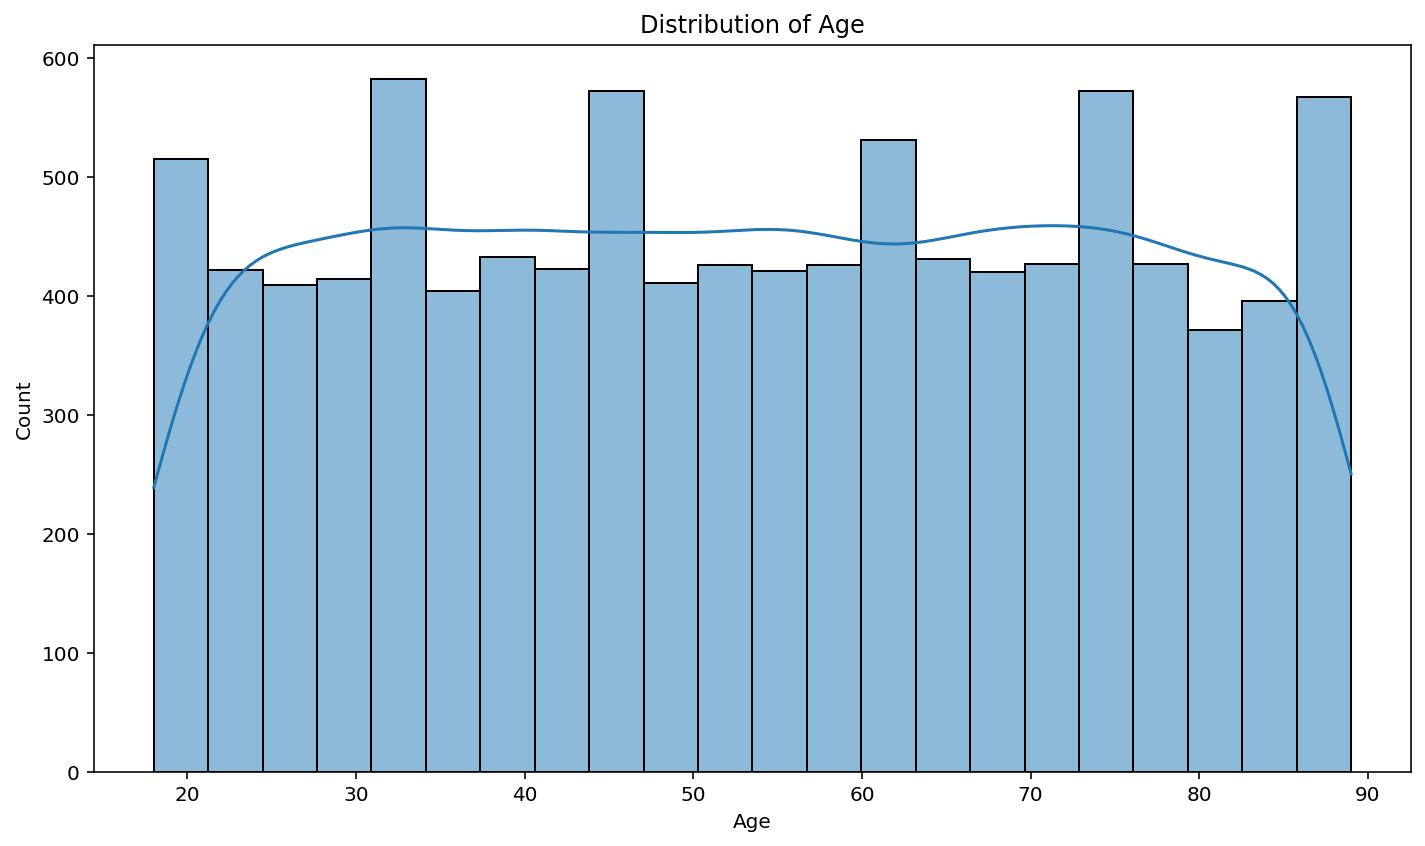

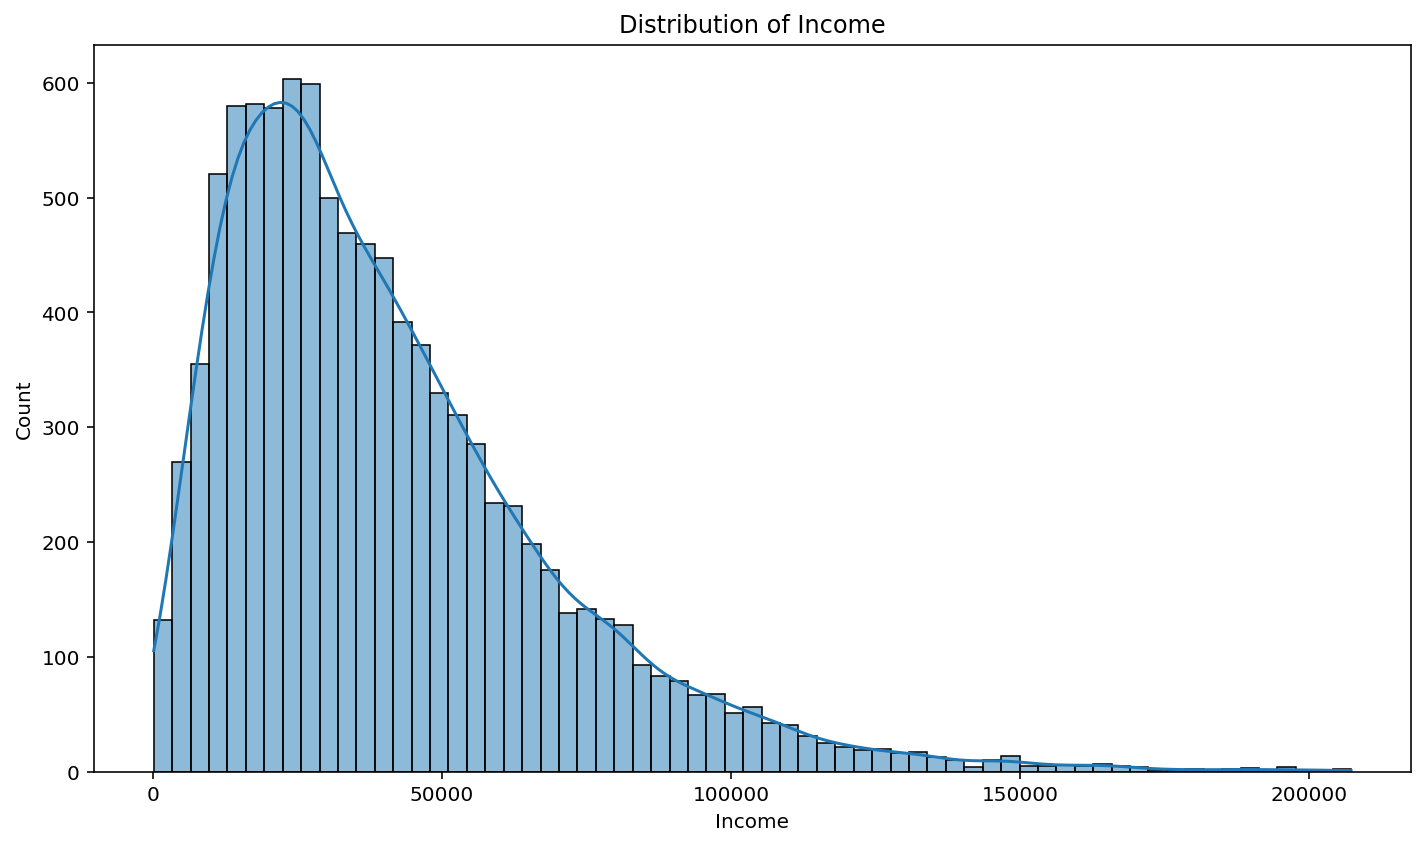

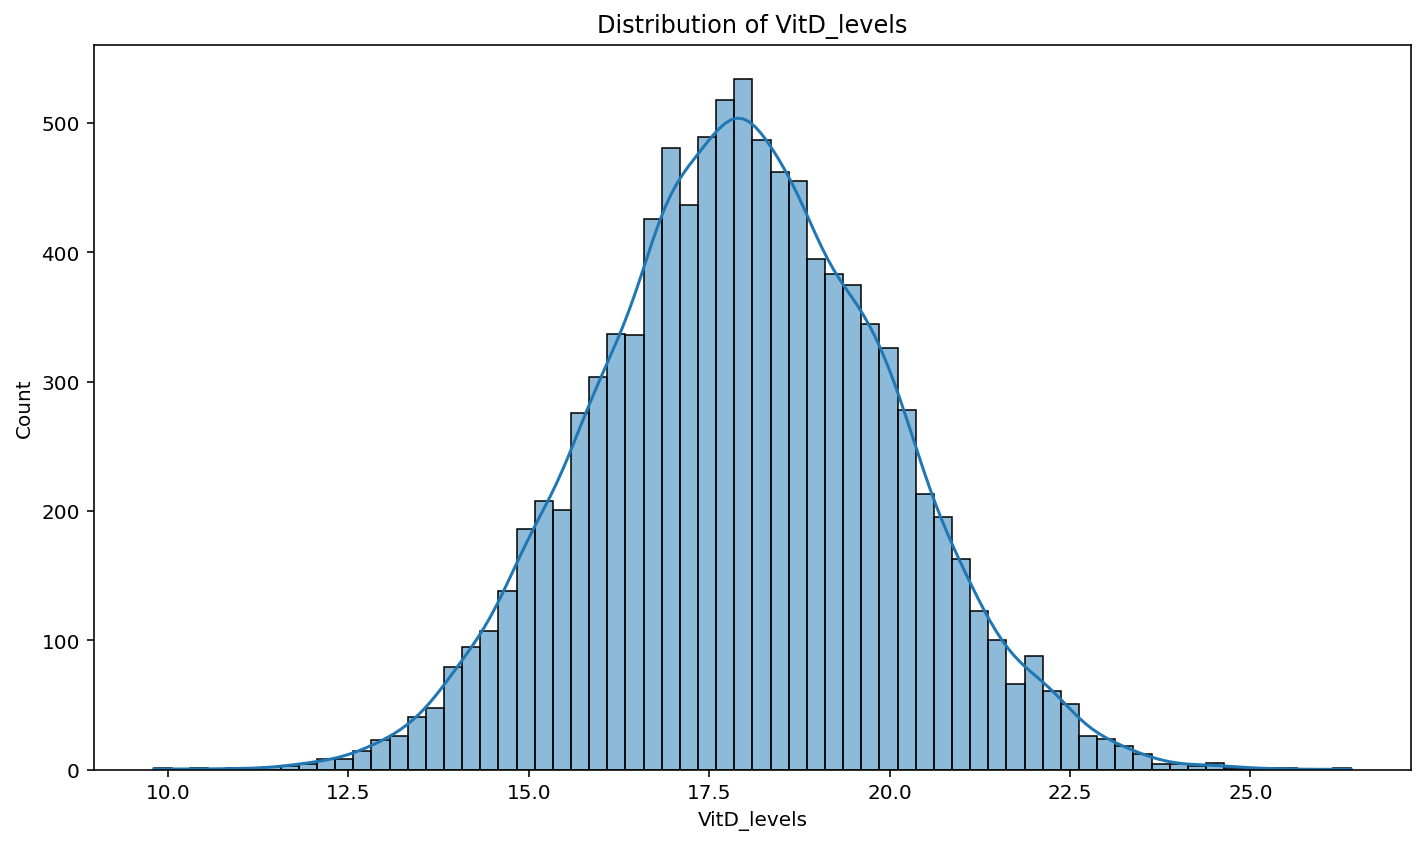

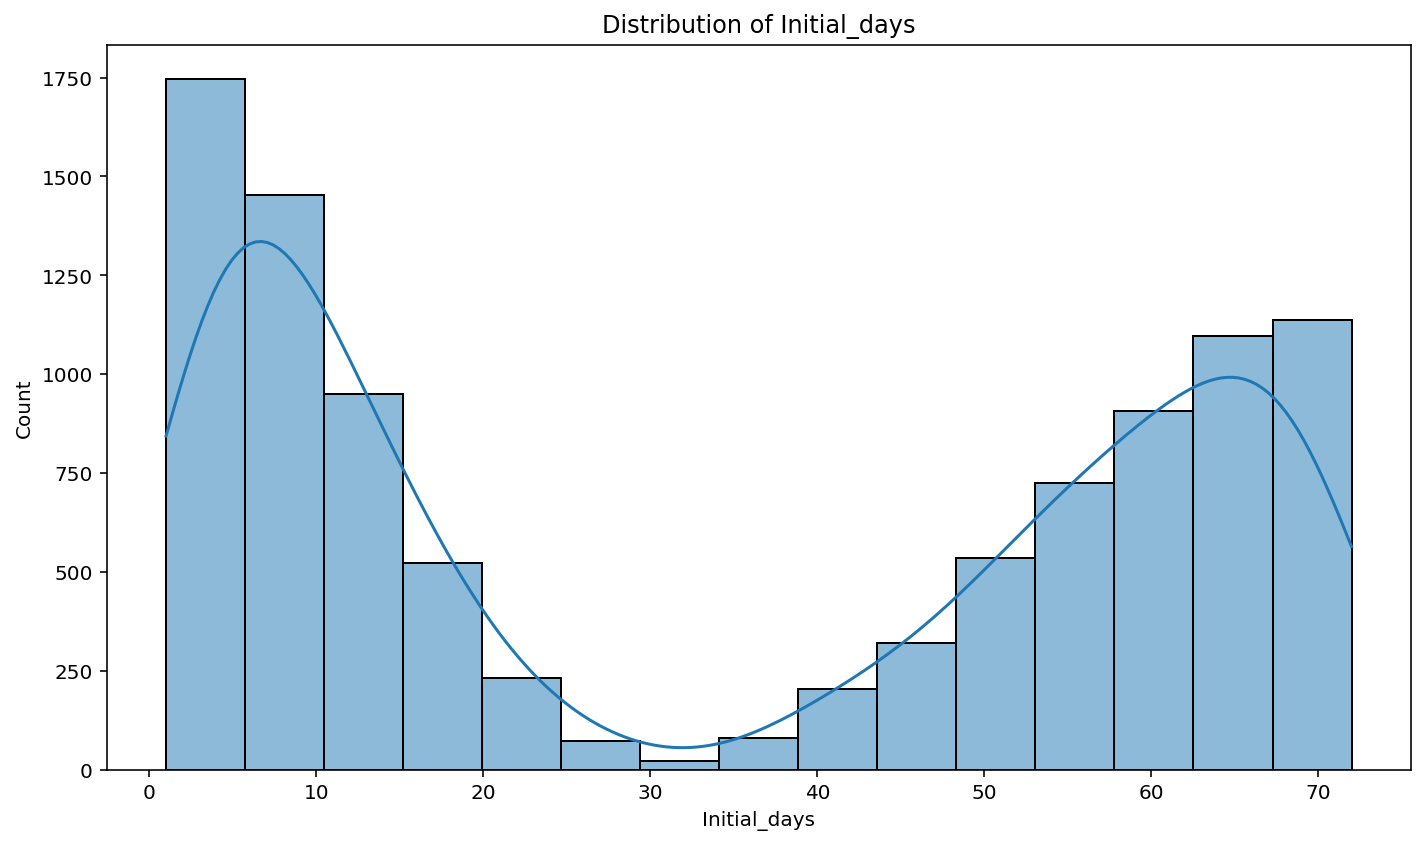

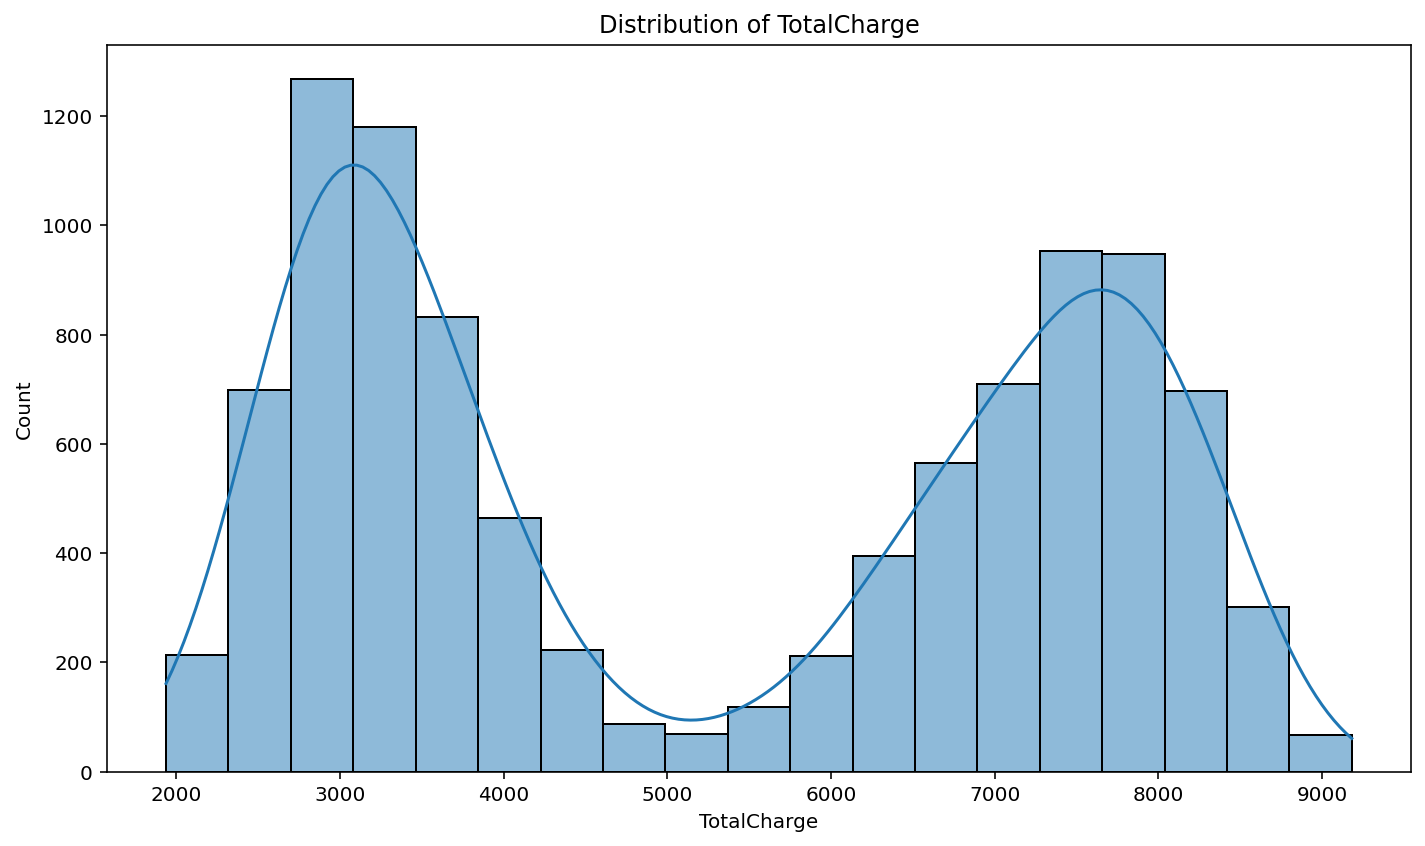

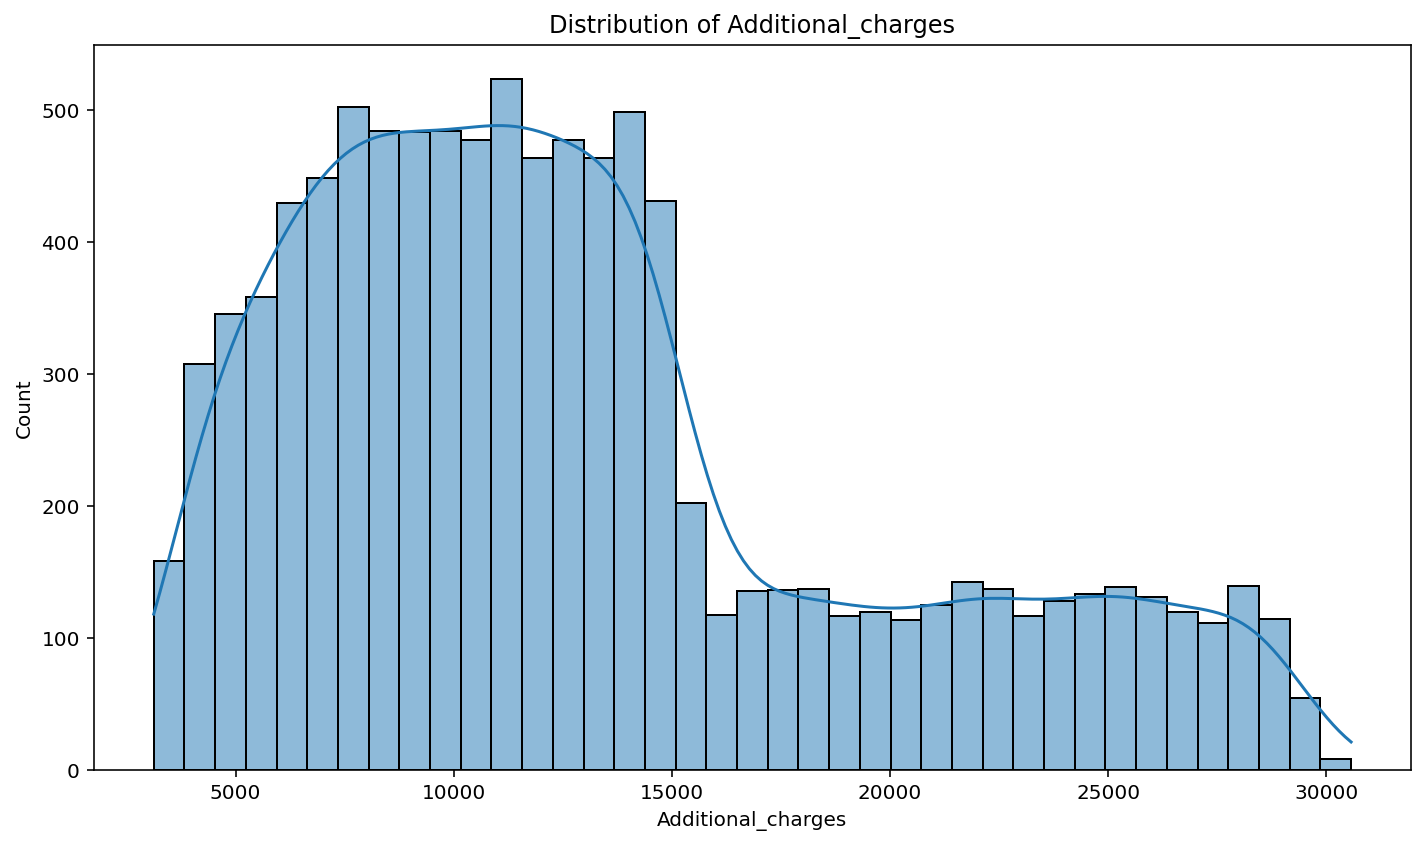

In [13]:
# Univariate visualizations

def plot_distributions(df, figsize=(10, 6), max_categories=30):
    """
    Create distribution plots for all columns in dataframe
    Numeric columns --> histograms, categorical --> bar plots.
    
    Parameters:
        df (pd.DataFrame): Input DataFrame
        figsize (tuple): Size of each plot (width, height)
        max_categories (int): Maximum number of categories in bar plots
    """
    for col in df.columns:
        col_data = df[col].dropna()
        
        plt.figure(figsize=figsize)
        
        if pd.api.types.is_numeric_dtype(col_data):
            # Histogram with KDE for numeric data
            sns.histplot(col_data, kde=True)
            plt.title(f'Distribution of {col}')
            
        else:
            # Bar plot for categorical data
            value_counts = col_data.value_counts()
            if len(value_counts) > max_categories:
                value_counts = value_counts.head(max_categories)
                plt.title(f'Top {max_categories} Categories in {col}')
            else:
                plt.title(f'Category Distribution of {col}')
                
            sns.barplot(x=value_counts.index, y=value_counts.values)
            plt.xticks(rotation=45, ha='right')
            
        plt.tight_layout()
        plt.show()
        
plot_distributions(df_cluster)

In [14]:
## Remove spaces in catagory names within columns
# To replace spaces with underscores in specific columns

for col in df_cluster.columns:
     if not pd.api.types.is_numeric_dtype(df_cluster[col]):
        df_cluster[col] = df_cluster[col].str.replace(" ", "_", regex = False) 
        
##Clean White Space and make all lower case
df_cluster.columns = df_cluster.columns.str.lower().str.strip()       

#round values to 2 decimal points
df_cluster = df_cluster.round(2).copy()

#Verify space removal/ replacement
df_cluster.head()

,age,income,vitd_levels,initial_days,totalcharge,additional_charges
0,53,86575.93,19.14,10.59,3726.70,17939.40
1,51,46805.99,18.94,15.13,4193.19,17613.00
2,53,14370.14,18.06,4.77,2434.23,17505.19
3,78,39741.49,16.58,1.71,2127.83,12993.44
4,22,1209.56,17.44,1.25,2113.07,3716.53


In [15]:
## Detect and clean outliers

##Function for Winsorization of outliers, using IQR
#https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-3-dcb54abaf7b0
def winz_outliers(df):
    
    print("Outlier Analysis Report")
    print("=" * 50)  # Print a separator line for visual clarity
    
    for col in df:
        if pd.api.types.is_numeric_dtype(df[col]): 
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))
            outlier_count = outliers.sum()
            
            if outlier_count > 0:
                outer_fence = 3 * IQR
                outer_fence_low = Q1 - outer_fence
                outer_fence_up = Q3 + outer_fence
                
                # Consolidating the print statements for each column
                print(f"\nColumn: {col}")
                print(f"Number of Outliers: {outlier_count}")
                print(f"Lower Outer Fence: {round(outer_fence_low, 2)}")
                print(f"Upper Outer Fence: {round(outer_fence_up, 2)}")

    print("=" * 50)  # End with a separator line for visual clarity


winz_outliers(df_cluster)

Outlier Analysis Report

Column: income
Number of Outliers: 326
Lower Outer Fence: -84494.11
Upper Outer Fence: 158389.28

Column: vitd_levels
Number of Outliers: 60
Lower Outer Fence: 8.46
Upper Outer Fence: 27.52

Column: additional_charges
Number of Outliers: 424
Lower Outer Fence: -14933.53
Upper Outer Fence: 38546.5


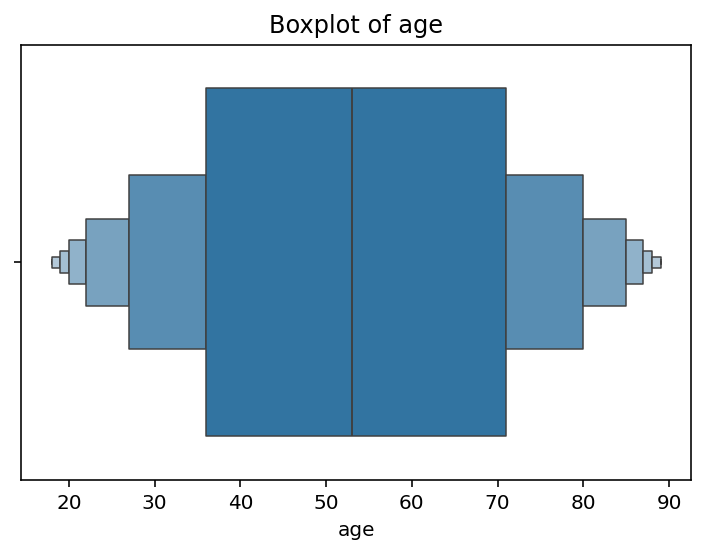

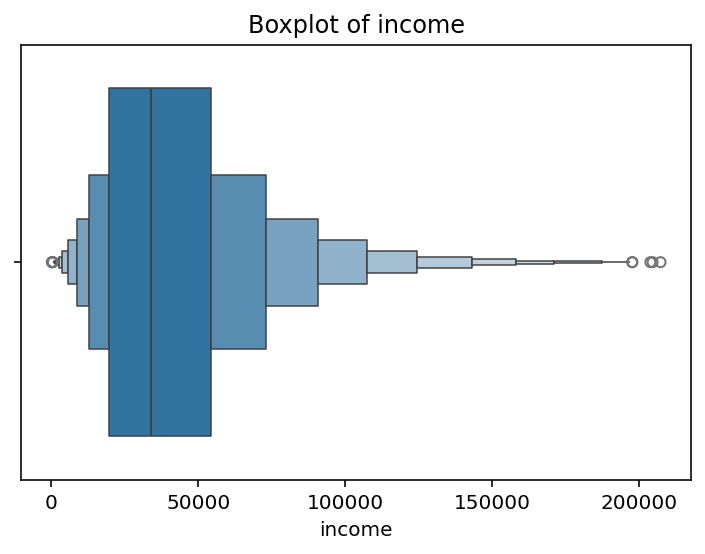

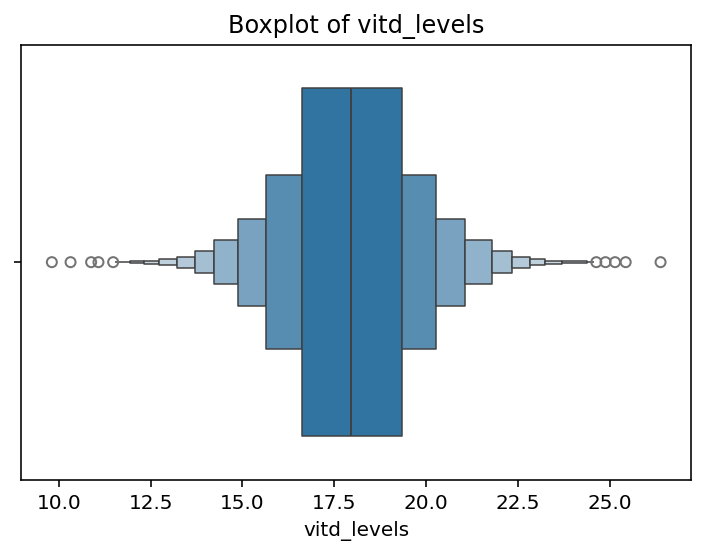

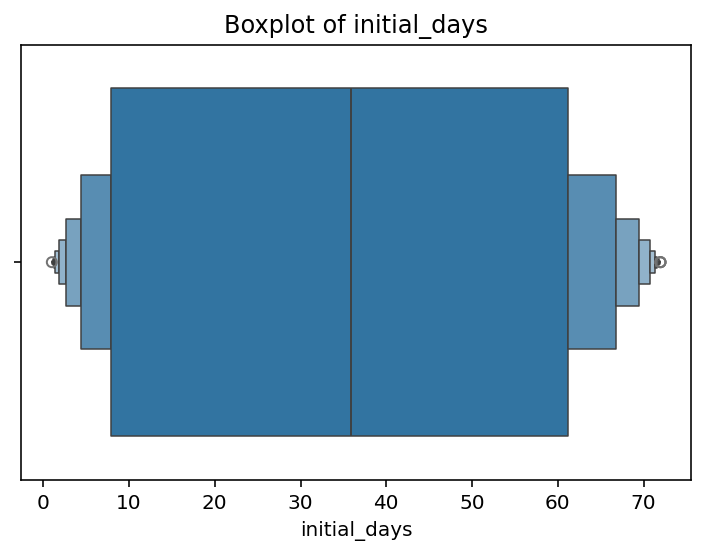

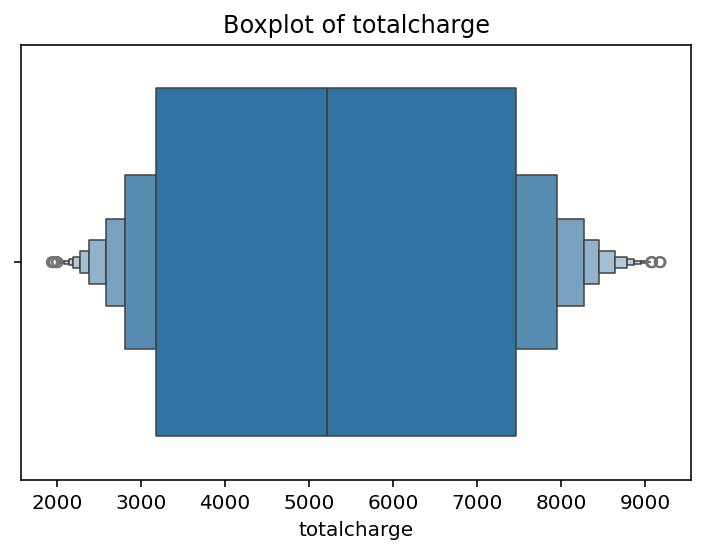

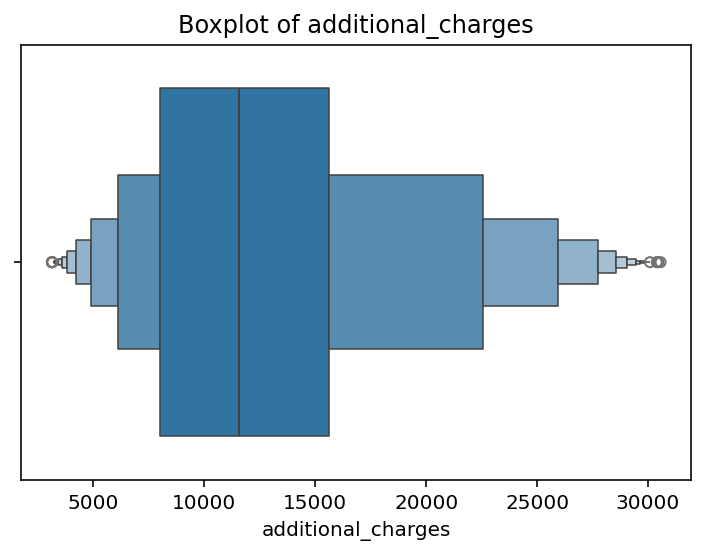

In [16]:
# Create a boxplot for each column to view outliers

for column in df_cluster:
    sns.boxenplot(x= df_cluster[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

The outliers are reasonable so will not be removed from the data

In [17]:
# Will use 3 variables for clustering - Age, VitD_levels, Initial_days
df_final = df_cluster[["age", "vitd_levels", "initial_days"]].copy()
df_final.head()

,age,vitd_levels,initial_days
0,53,19.14,10.59
1,51,18.94,15.13
2,53,18.06,4.77
3,78,16.58,1.71
4,22,17.44,1.25


In [18]:
# need to standardize the data. Will use Standard Scaler
# https://scikit-learn.org/dev/auto_examples/preprocessing/plot_all_scaling.html#plot-all-scaling-max-abs-scaler-section

scaled_df = StandardScaler().fit_transform(df_final)
scaled_df = pd.DataFrame(scaled_df, columns=df_final.columns)

In [19]:
scaled_df.head()

,age,vitd_levels,initial_days
0,-0.024795,0.582864,-0.907147
1,-0.121706,0.483714,-0.734576
2,-0.024795,0.047457,-1.128372
3,1.186592,-0.686249,-1.244686
4,-1.526914,-0.259906,-1.262171


In [20]:
# DataFrame of scaled_df has been cleaned and is ready for use in the analysis model.
# Export the data set as csv

# Download clean data as csv
scaled_df.to_csv('KMeans_data.csv', index=False)

In [21]:
#Instantiate the kmeans model and fit the data
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

kmeans_first = KMeans(init="k-means++",
                      n_clusters=3,
                      n_init=50,
                      random_state=42)
kmeans_first.fit(scaled_df)

KMeans(n_clusters=3, n_init=50, random_state=42)

In [22]:
# Look at the cluster labels
labels = kmeans_first.labels_
labels

array([1, 2, 2, ..., 0, 0, 0], dtype=int32)

In [23]:
# Count the labels
Counter(kmeans_first.labels_)

Counter({0: 4770, 2: 2624, 1: 2606})

In [24]:
# Look at the cluster centroids
centers = pd.DataFrame(kmeans_first.cluster_centers_, 
                     columns = ["age", "vitd_levels", "initial_days"])
centers

,age,vitd_levels,initial_days
0,0.013289,-0.015020,0.990028
1,0.875412,0.125286,-0.895295
2,-0.890872,-0.096785,-0.910532


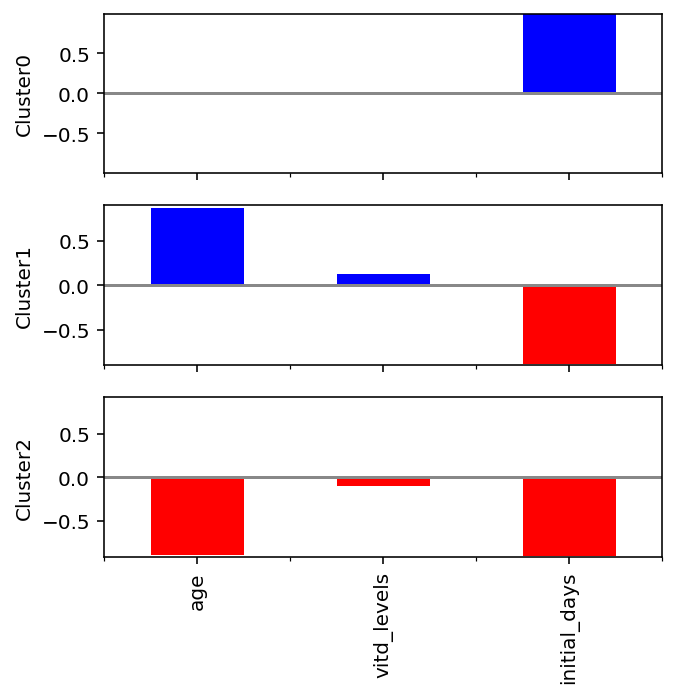

In [25]:
# Visualize the relationsships of the cluster centers
# Practical Statistics for data scientists,  pg 300
f, axes = plt.subplots(3, 1, figsize=(5, 5), sharex=True)  
for i, ax in enumerate(axes):
    center = centers.loc[i, :] 
    maxPC = 1.01 * np.max(np.abs(center))
    color = ["blue" if l > 0 else "red" for l in center]
    ax.axhline(color="#888888")
    center.plot.bar(ax=ax, color=color)
    ax.set_ylabel(f"Cluster{i}")
    ax.set_ylim(-maxPC, maxPC)

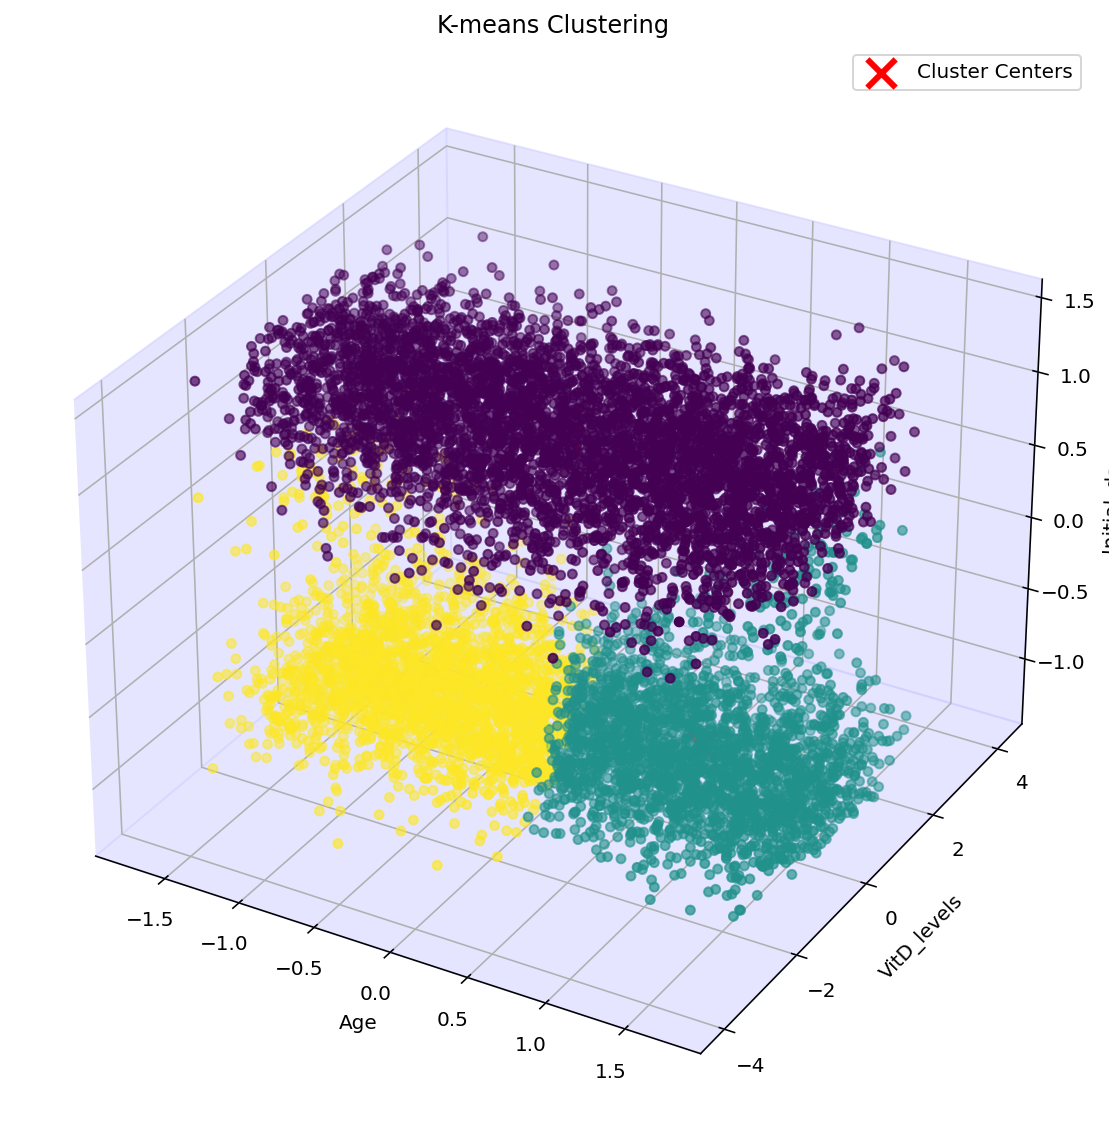

In [26]:
# Plot the data clusters
# https://vbatopandas.blogspot.com/2023/12/k-means-clustering-3d-plot-swiss-roll.html
# This  tutorial code has older syntax and had to be updated from w_xaxis, w_yaxis, w_zaxis (old)
# to new syntax xaxis.pane, yaxis.pane, zaxis.pane 

# Plot the data points
# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
scatter = ax.scatter(
    scaled_df['age'],
    scaled_df['vitd_levels'],
    scaled_df['initial_days'],
    c=labels, 
    cmap='viridis'
)

# Plot cluster centers
ax.scatter(
    centers['age'],
    centers['vitd_levels'],
    centers['initial_days'],
    marker='x',
    color='red',
    s=200,
    linewidths=3,
    label='Cluster Centers'
)

# Customize plot
ax.set_title("K-means Clustering")
ax.set_xlabel("Age")
ax.set_ylabel("VitD_levels")
ax.set_zlabel("Initial_days")

# Add legend
ax.legend()

# Set background color
for pane in [ax.xaxis.pane, ax.yaxis.pane, ax.zaxis.pane]:
    pane.fill = True
    pane.set_color((0.8, 0.8, 1.0, 1.0))

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Sum of Squared Errors')

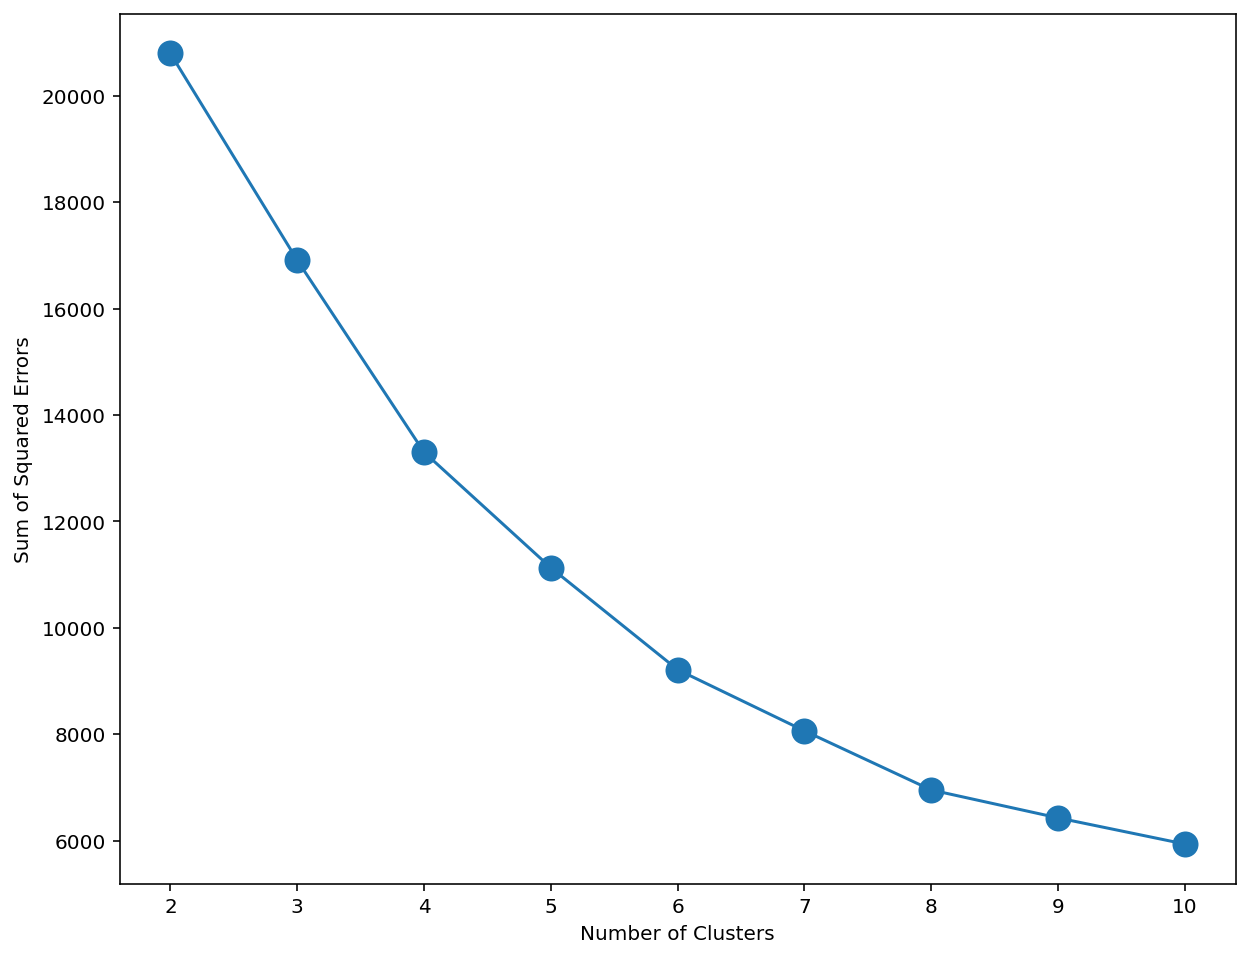

In [27]:
# Find best number of cluster for the Kmeans model using the SSE (inertia) and the elbow method
# https://www.statology.org/k-means-clustering-in-python/

# Create dictionary with keyword arguments for kmeans parameters
# https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.KMeans.html

kmeans_kwargs = {"init": "k-means++",    # the intitial 'init' cluster centers will be not  be chosen at 'random', but instead using k-means++
                "n_init": 50,            # the 'n'umber of times to 'init'alize the kmeans algorithm
                "random_state": 42}      # a number to use so that I can replicate the 'random state'. Irony?

# Find Sum of Squared errors (SSE)for each iteration of k. 
# lower SSE numbers are better fits of the model

sse =[]
for k in range(2,11):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_) # appends the SSE value , which is the inertia_ value
sse_s = pd.Series(sse, index = range(2, 11))    


plt.figure(figsize = (10, 8))
ax = sns.lineplot(y =sse_s, x = sse_s.index)
ax = sns.scatterplot(y =sse_s, x = sse_s.index, s = 200)
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Errors")

##### The ideal number of clusters appears to be 6
- The slope lessens at the "elbow" of 6


In [28]:
# Now perform clustering with the optimal values found (6)
kmeans_model = KMeans(init="k-means++",
                      n_clusters=6,
                      n_init=50,
                      random_state=42)
kmeans_model.fit(scaled_df)

KMeans(n_clusters=6, n_init=50, random_state=42)

In [29]:
#Find the silouette score to evaluate how good the K value is for the clusters
silhouette_first = silhouette_score(scaled_df, kmeans_first.labels_).round(4)
silhouette_first

0.2911

In [30]:
#Find the silouette score to evaluate how good the K value is for the clusters
silhouette_value = silhouette_score(scaled_df, kmeans_model.labels_).round(2)
silhouette_value

0.33

#### Sillouette score
[Understanding the Sillouette Score](https://futuremachinelearning.org/understanding-silhouette-score-a-key-metric-for-clustering/)

The score has improved from 0.29 (k=3) to 0.33 (k=6)

In [31]:
# Get the labels from the final model
final_labels = kmeans_model.labels_

In [32]:
# Get the centers from our final model
final_centers = pd.DataFrame(kmeans_model.cluster_centers_, 
                           columns=["age", "vitd_levels", "initial_days"])

In [33]:
# Add the cluter assignment to a column in the data frame
scaled_df["cluster"] = kmeans_model.labels_
print(scaled_df[:10])

        age  vitd_levels  initial_days  cluster
0 -0.024795     0.582864     -0.907147        2
1 -0.121706     0.483714     -0.734576        2
2 -0.024795     0.047457     -1.128372        1
3  1.186592    -0.686249     -1.244686        1
4 -1.526914    -0.259906     -1.262171        0
5  1.089681     0.815865     -1.083139        1
6 -0.170161    -1.593466     -0.965304        0
7 -0.654716     0.855525     -0.768786        2
8 -0.267072     0.835695     -1.074776        2
9  1.186592     0.126776     -1.247727        1


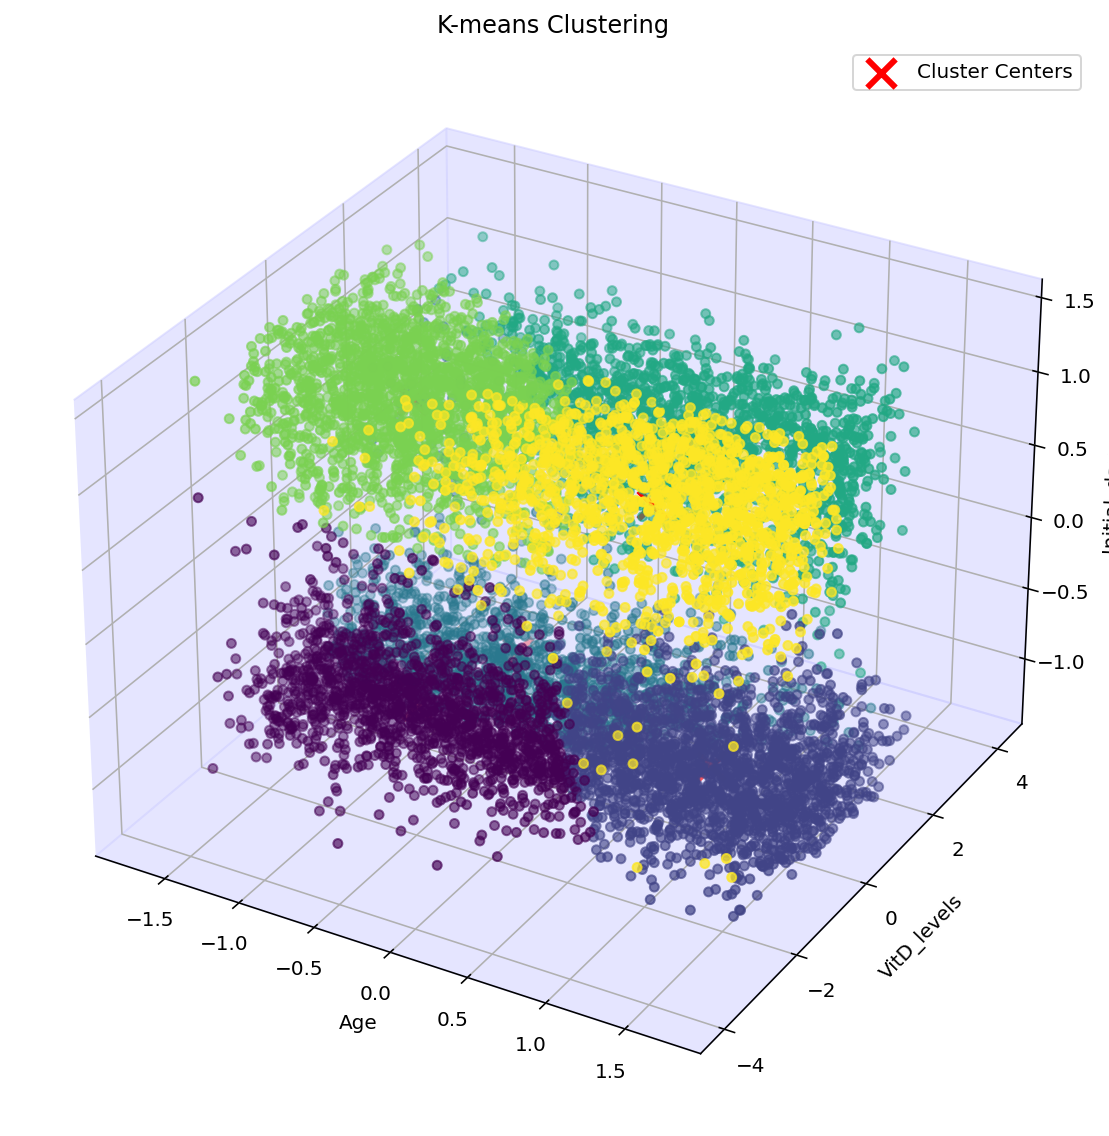

In [34]:
# Plot the data points
# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
scatter = ax.scatter(
    scaled_df['age'],
    scaled_df['vitd_levels'],
    scaled_df['initial_days'],
    c=final_labels, 
    cmap='viridis'
)

# Plot cluster centers
ax.scatter(
    final_centers['age'],
    final_centers['vitd_levels'],
    final_centers['initial_days'],
    marker='x',
    color='red',
    s=200,
    linewidths=3,
    label='Cluster Centers'
)

# Customize plot
ax.set_title("K-means Clustering")
ax.set_xlabel("Age")
ax.set_ylabel("VitD_levels")
ax.set_zlabel("Initial_days")

# Add legend
ax.legend()

# Set background color
for pane in [ax.xaxis.pane, ax.yaxis.pane, ax.zaxis.pane]:
    pane.fill = True
    pane.set_color((0.8, 0.8, 1.0, 1.0))

plt.tight_layout()
plt.show()

In [35]:
# Count the labels
Counter(kmeans_model.labels_)

Counter({1: 2001, 4: 1950, 0: 1656, 3: 1521, 5: 1463, 2: 1409})

In [36]:
# Look at the cluster centroids
centers = pd.DataFrame(kmeans_model.cluster_centers_, 
                     columns = ["age", "vitd_levels", "initial_days"])
centers

,age,vitd_levels,initial_days
0,-0.805865,-0.748344,-0.945792
1,0.979881,-0.070038,-0.957199
2,-0.572131,1.053372,-0.901918
3,0.615901,0.943604,0.965242
4,-0.965318,-0.125109,0.977904
5,0.771922,-0.882233,0.941495


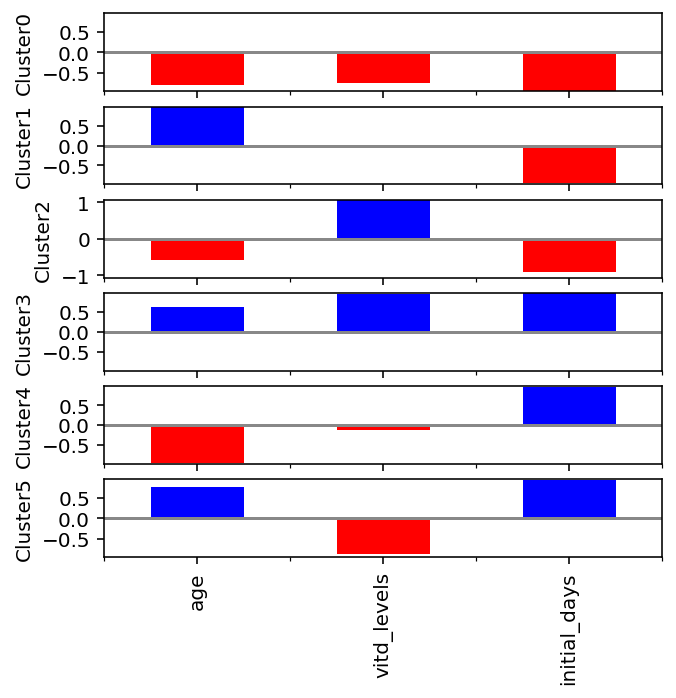

In [37]:
# Visualize the relationships of the cluster centers for the final K-means model
# Practical Statistics for data scientists,  pg 300

f, axes = plt.subplots(6, 1, figsize=(5, 5), sharex=True)  
for i, ax in enumerate(axes):
    center = centers.loc[i, :] 
    maxPC = 1.01 * np.max(np.abs(center))
    color = ["blue" if l > 0 else "red" for l in center]
    ax.axhline(color="#888888")
    center.plot.bar(ax=ax, color=color)
    ax.set_ylabel(f"Cluster{i}")
    ax.set_ylim(-maxPC, maxPC)

### Cluster Types
- Cluster 0
--young patient, very low vit D levels, very low number of days in hospital
- Cluster 1
-- highest aged patients, below average vit d, significantly less days in hospital
- Cluster 2
-- younger  patient, high Vit D levels, low number of days in hospital
- Cluster 3
-- medium age patient, High level VitD, High number of days in hosp
- Cluster 4
-- youngest aged patients, below average vit d levels, High number of days in hospital
- Cluster 5
-- higher aged patients, very low Vit D levels, High number of days in hospital

